In [1]:
import pandas as pd
import textwrap as tw

import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')
%matplotlib inline
pio.renderers.default = "svg"

We read in the tweets, set the date to the correct format and reverse it so we have the oldest tweets first.

In [2]:
tweets = pd.read_csv("../tweets/alltweets.csv", index_col=0)
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets = tweets[::-1].reset_index(drop=True)
tweets

,id,created_at,tweet,nlikes,nreplies,nretweets
0,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",4652,391,348
1,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,189,32,15
2,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/...,78,31,9
3,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",29,7,25
4,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,53,31,6
...,...,...,...,...,...,...
15578,1500621510188285956,2022-03-06 23:57:02,Also nuclear is vastly better for global warmi...,102921,2425,8313
15579,1500622046987882504,2022-03-06 23:59:10,RT @Tesla: Giga Berlin darf eröffnen 🇩🇪🚘 Com...,0,0,1629
15580,1500635105953419265,2022-03-07 00:51:04,@GailAlfarATX @Tesla @TeslaSolar @japan @vigol...,5380,261,247
15581,1500730165239988227,2022-03-07 07:08:48,@hiromichimizuno @GailAlfarATX @Tesla @TeslaSo...,1399,214,277


We have a total of 15583 tweets.

We have 6 columns:
1. `id`: unique identifier for each tweet
2. `created_at`: date and time of tweet
2. `tweet`: the tweet content, including hashtags, mentions, urls, etc.
3. `nlikes`: number of likes
4. `nreplies`: number of replies
5. `nretweets`: number of retweets

In [15]:
# remove hastags, mentions, and urls
clean_tweets = tweets.tweet.str.replace(r'http\S+|#\S+|@\S+', '', regex=True)
tweets["unclean_tweet"] = tweets["tweet"]
tweets["tweet"] = clean_tweets

In [4]:
tweets.head()

,id,created_at,tweet,nlikes,nreplies,nretweets,unclean_tweet
0,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",4652,391,348,"Please ignore prior tweets, as that was someon..."
1,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,189,32,15,Went to Iceland on Sat to ride bumper cars on ...
2,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S go to 11. ...,78,31,9,I made the volume on the Model S http://t.co/...
3,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",29,7,25,"Great Voltaire quote, arguably better than Twa..."
4,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,53,31,6,That was a total non sequitur btw


{'Bitcoin': 36, 'Dogecoin': 67, 'Tesla': 1227, 'Tesla Stock': 13, 'Stock': 45, 'Buy': 81, 'Sell': 66}


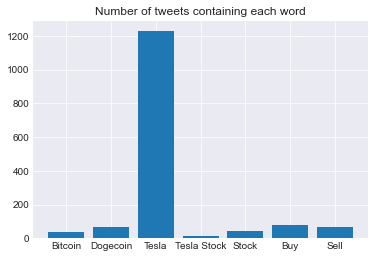

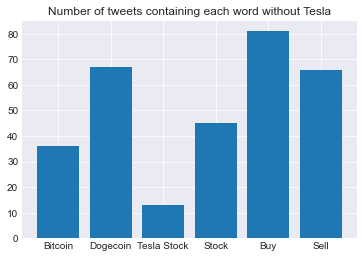

In [5]:
interesting_words = ["Bitcoin", "Dogecoin", "Tesla", "Tesla Stock", "Stock", "Buy", "Sell"]
interesting_regex = ["bitcoin|btc", "dogecoin|doge", "tesla", "tesla stock|tsla", "stock", "buy", "sell"]

counts = {}
for word, regex in zip(interesting_words, interesting_regex):
    counts[word] = tweets.tweet.str.lower().str.contains(regex, regex=True).sum()

print(counts)
plt.bar(counts.keys(), counts.values())
plt.title("Number of tweets containing each word")
plt.show()
counts.pop("Tesla")
plt.bar(counts.keys(), counts.values())
plt.title("Number of tweets containing each word without Tesla")
plt.show()

We can see that the word "Tesla" is very common in the tweets (it appears 1227 times), which makes sense as Musk is the CEO of Tesla.

However, the combination "tesla stock" or "tsla" refers to the asset and appears only a total of 13 times.

We have 36 tweets containing the word "Bitcoin" and 67 containing the word "Dogecoin".

The words Stock, Buy and Sell are also in the tweets, Stock appears 45 times, Buy appears 82 times and Sell appears 66 times.  

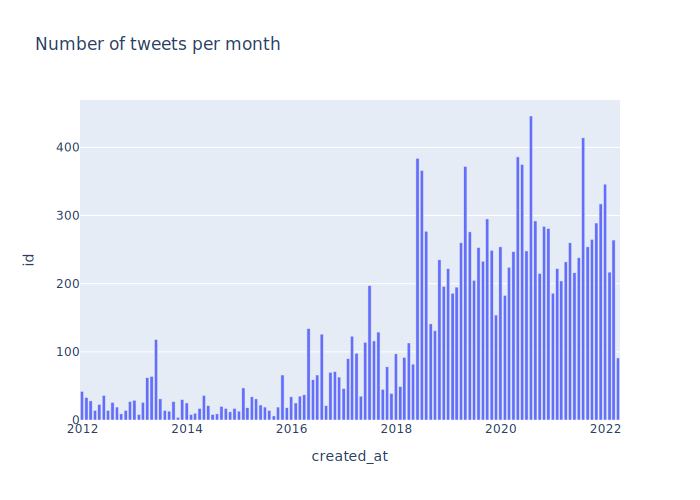

In [6]:
df_time = tweets[1:].resample('M', on='created_at').agg({"id": "count", "nlikes": "sum", "nreplies": "sum", "nretweets": "sum"})
px.bar(df_time, y="id", title="Number of tweets per month")

In [7]:
tweets[1:].resample('Y', on='created_at').agg({"id": "count", "nlikes": "sum", "nreplies": "sum", "nretweets": "sum"}).rename(columns={"id": "number_of_tweets"})

,number_of_tweets,nlikes,nreplies,nretweets
created_at,,,,
2011-12-31,42,292466,3966,56745
2012-12-31,272,94609,8671,42700
2013-12-31,422,76942,27712,112383
2014-12-31,188,170540,23554,135279
2015-12-31,328,585180,56696,357512
2016-12-31,753,2229868,116876,723434
2017-12-31,1161,11725423,450452,2526689
2018-12-31,2288,37139538,1161772,4948944
2019-12-31,2932,63530908,1297657,6304778


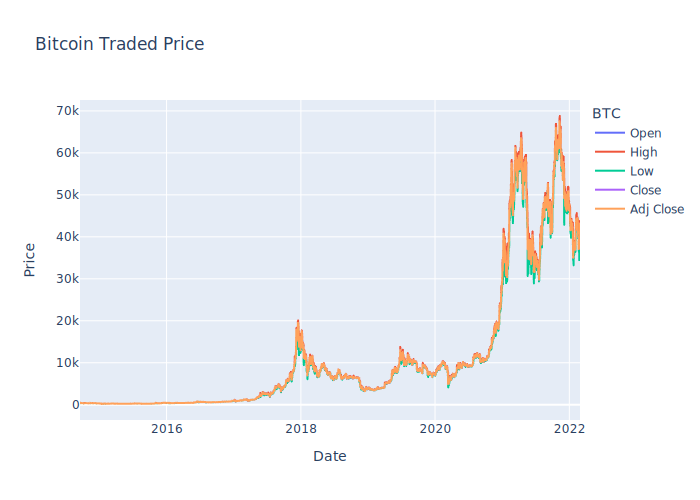

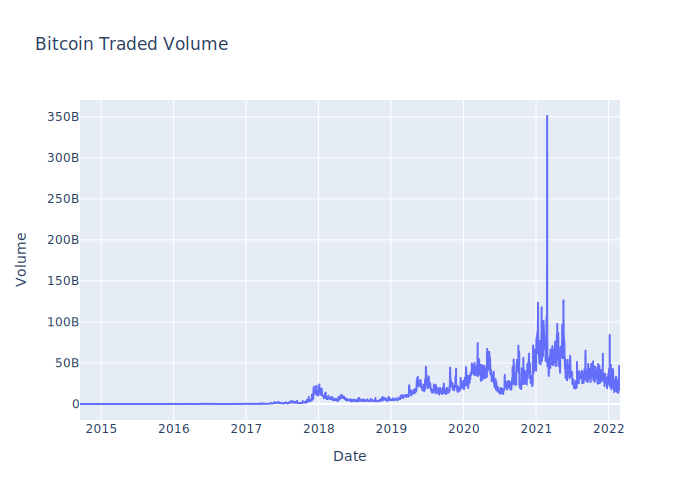

In [8]:
bitcoin = pd.read_csv("../bitcoin/bitcoin.csv")
bitcoin.Date = pd.to_datetime(bitcoin.Date)
px.line(bitcoin.melt(id_vars=['Date', 'Volume'], 
                     var_name='BTC', 
                     value_name='Price'), 
        x='Date', y='Price', color='BTC', title="Bitcoin Traded Price").show()
px.line(bitcoin, x='Date', y='Volume', title="Bitcoin Traded Volume").show()

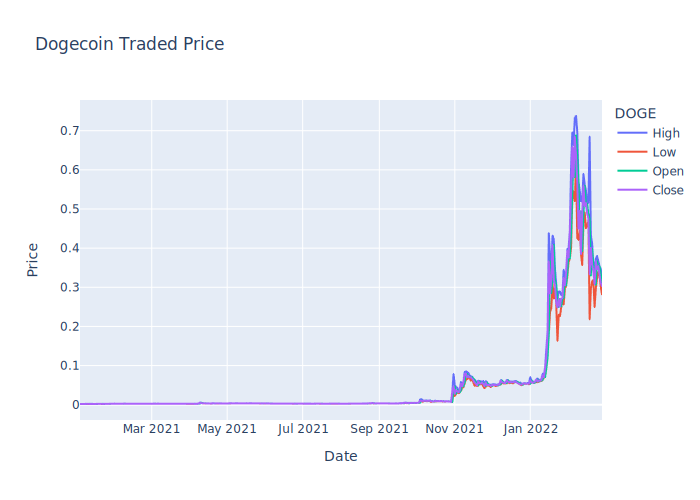

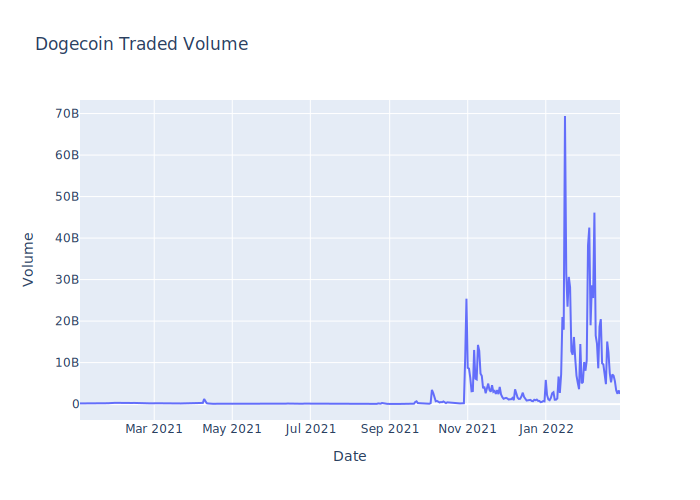

In [9]:
dogecoin = pd.read_csv("../crypto/coin_Dogecoin.csv")
dogecoin.Date = pd.to_datetime(bitcoin.Date)
px.line(dogecoin[dogecoin.Date > '2021-01-01'].melt(id_vars=['Date', 'Volume', 'Name', 'Symbol', 'Marketcap', 'SNo'], 
                                                    var_name='DOGE', 
                                                    value_name='Price'), 
        x='Date', y='Price', color='DOGE', title="Dogecoin Traded Price").show()
px.line(dogecoin[dogecoin.Date > '2021-01-01'], x='Date', y='Volume', title="Dogecoin Traded Volume").show()

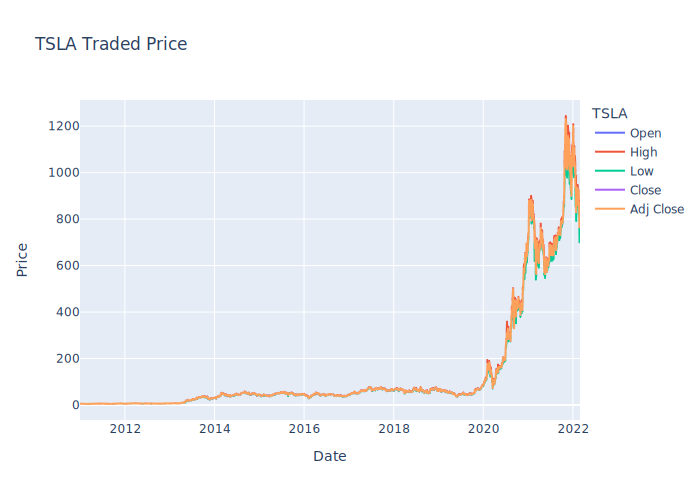

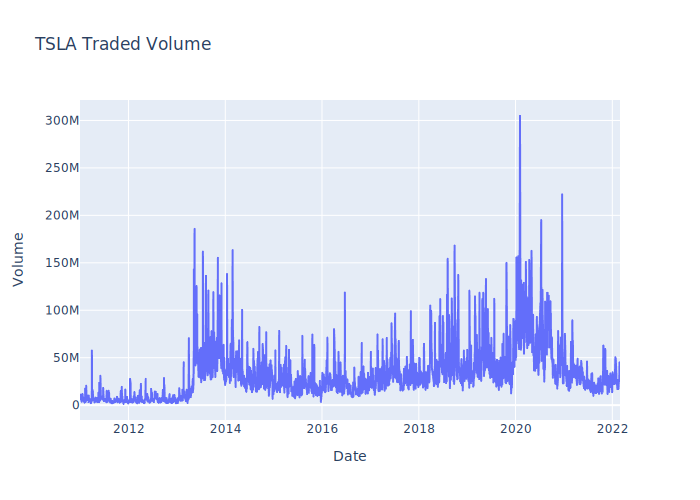

In [10]:
tesla = pd.read_csv("../tesla/tesla.csv")
tesla.Date = pd.to_datetime(tesla.Date)
px.line(tesla.melt(id_vars=['Date', 'Volume'], 
                   var_name='TSLA', 
                   value_name='Price'), 
        x='Date', y='Price', color='TSLA', title="TSLA Traded Price").show()
px.line(tesla, x='Date', y='Volume', title="TSLA Traded Volume").show()

The data we have collected for the different assets are at the moment the Open, High, Low and Close Prices of the asset for every day since 2012.

In [11]:
def plot_asset_and_tweets(asset_df, tweet_df, price_type = "Close", title = ""):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=asset_df["Date"], 
                             y=asset_df[price_type], 
                             name=f"Asset Price ({price_type})"))

    tweet_df["created_at"] = pd.to_datetime(tweet_df["created_at"]).map(lambda x: x.replace(hour=0, minute=0, second=0))
    asset_df["Date"] = pd.to_datetime(asset_df["Date"]).map(lambda x: x.replace(hour=0, minute=0, second=0))
    merged = pd.merge(left=tweet_df, left_on="created_at", right=asset_df, right_on="Date")

    fig.add_trace(go.Scatter(x=merged["created_at"], 
                             y=merged[price_type], 
                             name="Relevent Tweets", 
                             mode='markers',
                             hovertemplate ="<br>".join([
                                            'Price: %{y:.2f}',
                                            'Date: %{x}',
                                            'Tweet: %{text}',
                                            '<extra></extra>',
                                            ]),
                             marker_symbol="x",
                             text=merged["tweet"].map(lambda s: "<br>".join(tw.wrap(s))),
                             customdata=["slope"]))
    if title:
        fig.update_layout(title=title)
    return fig

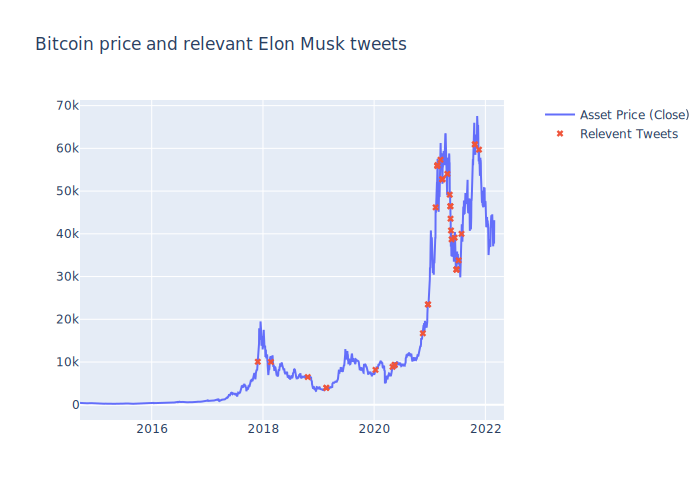

In [12]:
bitcoin_tweets = tweets[tweets.tweet.str.lower().str.contains("bitcoin|btc", regex=True)].reset_index()
plot_asset_and_tweets(bitcoin, bitcoin_tweets, title="Bitcoin price and relevant Elon Musk tweets").show()

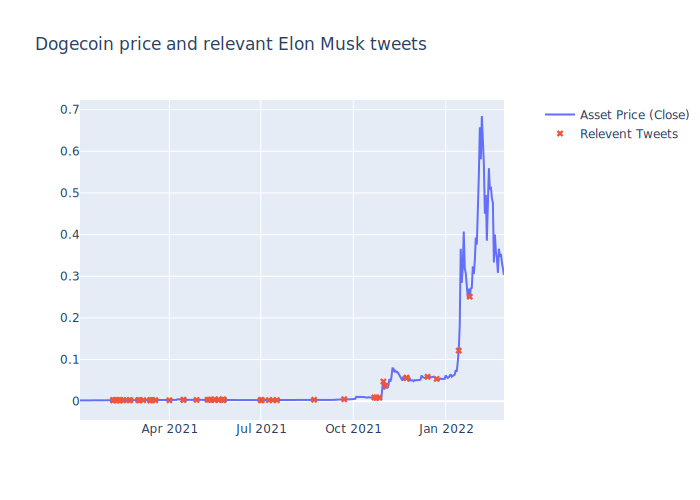

In [13]:
doge_tweets = tweets[tweets.tweet.str.lower().str.contains("doge", regex=True)].reset_index()
df = dogecoin[dogecoin.Date > '2021-01-01'].reset_index()
plot_asset_and_tweets(df, doge_tweets, title="Dogecoin price and relevant Elon Musk tweets").show()

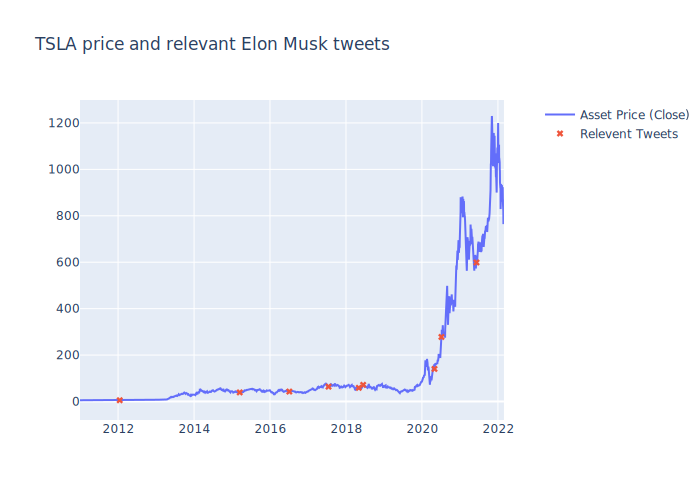

In [14]:
tsla_tweets = tweets[tweets.tweet.str.lower().str.contains("tsla|tesla stock", regex=True)].reset_index()
plot_asset_and_tweets(tesla, tsla_tweets, title="TSLA price and relevant Elon Musk tweets").show()